In [41]:
import geopy
import pandas as pd


In [42]:
# reading dataset
data2022_load = "datasets/COBRA-2022.csv"

data2022 = pd.read_csv(data2022_load)
#data2022
data2022.shape

(21575, 17)

In [43]:
# drop NAs
data2022 = data2022.dropna(how='any')
data2022.shape
#data2022.shape[0]
#type(data2022)

(20106, 17)

In [101]:
# working on all OR chunk of data
r=input("how many rows do you want to keep?")
if r == "all":
    data = data2022
else:
    r=int(r)
    #data = data2022.drop(data2022.index[r:data2022.shape[0]], inplace=True)
    data =data2022.drop(data2022.index[r:])

data.shape

how many rows do you want to keep?all


(20106, 20)

In [102]:
# add column for furthur analysis
data["zipcode"] = ""
data["time_range"] = ""
data["pop"] = ""
data.shape
data

,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,beat,zone,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long,zipcode,time_range,pop
0,22011609,7/20/2022,7/20/2022,Wednesday,4.0,18:30,7/20/2022,19:00,607,6,"1395 CUSTER WAY SE\nATLANTA, GA 30316\nUNITED ...",23H,LARCENY-NON VEHICLE,Custer/McDonough/Guice,W,33.716073,-84.353217,,,
1,22254073,9/11/2022,9/11/2022,Sunday,1.0,11:15,9/11/2022,11:45,606,6,"777 MEMORIAL DR SE\nATLANTA, GA 30316\nUNITED ...",23F,LARCENY-FROM VEHICLE,Reynoldstown,N,33.746335,-84.361753,,,
2,202800283,6/14/2022,10/6/2020,Tuesday,3.0,05:21,10/6/2020,05:40,413,4,"4050 BLANTON AVE SW\nATLANTA, GA 30331\nUNITED...",23F,LARCENY-FROM VEHICLE,Fairburn,P,33.690551,-84.520970,,,
3,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,409,4,"2111 CAMPBELLTON RD SW\nATLANTA, GA 30311\nUNI...",13A,AGG ASSAULT,Adams Park,R,33.706526,-84.458000,,,
4,203250206,4/15/2022,11/20/2020,Friday,6.0,01:40,11/20/2020,01:45,109,1,"2621 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23H,LARCENY-NON VEHICLE,Center Hill,J,33.776168,-84.472729,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,223641776,12/30/2022,12/30/2022,Friday,6.0,19:08,12/30/2022,19:09,614,6,"650 PONCE DE LEON AVE NE\nATL, GA 30308\nUNITE...",23C,LARCENY-NON VEHICLE,Midtown,E,33.775198,-84.365840,,,
21569,223641783,12/30/2022,12/30/2022,Friday,6.0,14:51,12/30/2022,16:40,303,3,"520 FULTON ST SW\nATL, GA 30312\nUNITED STATES",23H,LARCENY-NON VEHICLE,Mechanicsville,V,33.740863,-84.404238,,,
21570,223641886,12/30/2022,12/30/2022,Friday,6.0,17:00,12/30/2022,22:42,102,1,"870 MAYSON TURNER RD NW\nATL, GA 30314\nUNITED...",240,AUTO THEFT,Vine City,L,33.755968,-84.416293,,,
21571,223641980,12/30/2022,12/30/2022,Friday,6.0,21:03,12/30/2022,21:37,602,6,"240 N HIGHLAND AVE NE\nATL, GA 30307\nUNITED S...",23F,LARCENY-FROM VEHICLE,Inman Park,N,33.761914,-84.360387,,,


In [103]:
#reset index beause of removed rows
data = data.reset_index()
#data

In [104]:
# grab the zipcode from address
for i in range(0,data.shape[0]):
    m = data["location"][i].split()
    #print(m)
    data["zipcode"][i] = m[-3] 
data                                 

C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\1980308384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["zipcode"][i] = m[-3]


,index,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,beat,...,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long,zipcode,time_range,pop
0,0,22011609,7/20/2022,7/20/2022,Wednesday,4.0,18:30,7/20/2022,19:00,607,...,"1395 CUSTER WAY SE\nATLANTA, GA 30316\nUNITED ...",23H,LARCENY-NON VEHICLE,Custer/McDonough/Guice,W,33.716073,-84.353217,30316,,
1,1,22254073,9/11/2022,9/11/2022,Sunday,1.0,11:15,9/11/2022,11:45,606,...,"777 MEMORIAL DR SE\nATLANTA, GA 30316\nUNITED ...",23F,LARCENY-FROM VEHICLE,Reynoldstown,N,33.746335,-84.361753,30316,,
2,2,202800283,6/14/2022,10/6/2020,Tuesday,3.0,05:21,10/6/2020,05:40,413,...,"4050 BLANTON AVE SW\nATLANTA, GA 30331\nUNITED...",23F,LARCENY-FROM VEHICLE,Fairburn,P,33.690551,-84.520970,30331,,
3,3,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,409,...,"2111 CAMPBELLTON RD SW\nATLANTA, GA 30311\nUNI...",13A,AGG ASSAULT,Adams Park,R,33.706526,-84.458000,30311,,
4,4,203250206,4/15/2022,11/20/2020,Friday,6.0,01:40,11/20/2020,01:45,109,...,"2621 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23H,LARCENY-NON VEHICLE,Center Hill,J,33.776168,-84.472729,30318,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101,21568,223641776,12/30/2022,12/30/2022,Friday,6.0,19:08,12/30/2022,19:09,614,...,"650 PONCE DE LEON AVE NE\nATL, GA 30308\nUNITE...",23C,LARCENY-NON VEHICLE,Midtown,E,33.775198,-84.365840,30308,,
20102,21569,223641783,12/30/2022,12/30/2022,Friday,6.0,14:51,12/30/2022,16:40,303,...,"520 FULTON ST SW\nATL, GA 30312\nUNITED STATES",23H,LARCENY-NON VEHICLE,Mechanicsville,V,33.740863,-84.404238,30312,,
20103,21570,223641886,12/30/2022,12/30/2022,Friday,6.0,17:00,12/30/2022,22:42,102,...,"870 MAYSON TURNER RD NW\nATL, GA 30314\nUNITED...",240,AUTO THEFT,Vine City,L,33.755968,-84.416293,30314,,
20104,21571,223641980,12/30/2022,12/30/2022,Friday,6.0,21:03,12/30/2022,21:37,602,...,"240 N HIGHLAND AVE NE\nATL, GA 30307\nUNITED S...",23F,LARCENY-FROM VEHICLE,Inman Park,N,33.761914,-84.360387,30307,,


In [105]:
# check data make sure everything is matched with Atlanta zipcdes
drop_row = []
for i in range(0,data.shape[0]):
    if data["zipcode"][i][0] != '3':
        data["zipcode"][i] = " "
        drop_row.append(i)
drop_row

C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\1222634846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["zipcode"][i] = " "


[2627, 5469, 11597, 16197, 17118]

In [107]:
# reseting index because if dropped rows
data1 = data.drop(drop_row)
data_new = data1.reset_index()

        

In [108]:
# group by zipcode
data_new.groupby("zipcode").count()["offense_id"]

zipcode
30032       1
30303    1055
30305     648
30306     605
30307     710
30308    1178
30309    1155
30310    1575
30311     927
30312    1330
30313     508
30314    1061
30315    1699
30316     765
30317     318
30318    2926
30319      46
30324     959
30326     660
30327     122
30331    1163
30336       6
30342     132
30344       8
30354     430
30361       1
30363     108
30380       1
31126       4
Name: offense_id, dtype: int64

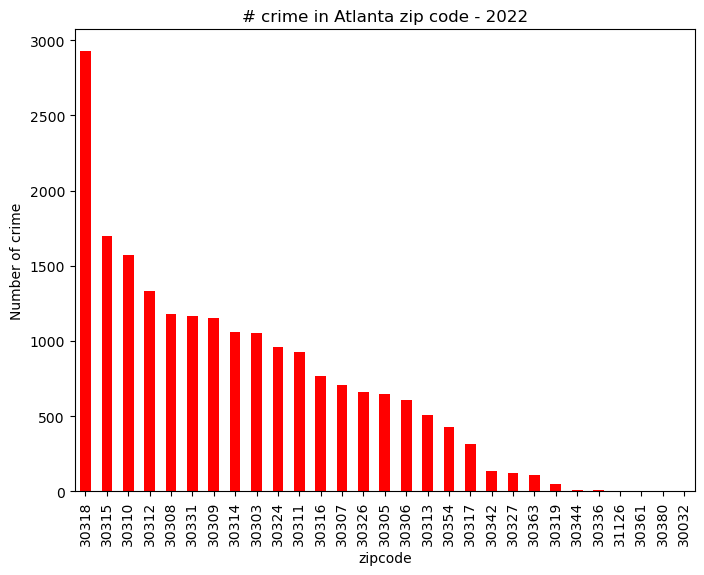

In [109]:
# bar chart  - # crime
y = data_new.groupby(["zipcode"]).count().sort_values(by="offense_id", ascending=False)["offense_id"]
#x1 = clean_data["Drug Regimen"].unique()

figure = y.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="# crime in Atlanta zip code - 2022",
                                xlabel="zipcode",
                                ylabel="Number of crime")

#xticklabels = data["zipcode"].unique()
#figure1.set_xticklabels(xticklabels, rotation= 45, rotation_mode="anchor", ha="right", wrap=True)

#plt.show()

In [114]:
# filter avaible zipcodes and check with population dataset 
filter_zip = data_new["zipcode"].unique()
filter_zip

array(['30316', '30331', '30311', '30318', '30310', '30308', '30324',
       '30312', '30315', '30309', '30314', '30303', '30326', '30305',
       '30307', '30306', '30313', '30327', '30344', '30354', '30363',
       '30317', '30319', '30342', '30336', '31126', '30361', '30380',
       '30032'], dtype=object)

In [118]:
# importing the pop dataset
pop_load = "datasets/2010pop.csv"

pop = pd.read_csv(pop_load)

drop_row2 = []
for i in range(0,pop.shape[0]):
    if pop["Row Labels"][i] not in filter_zip:
        pop["Row Labels"][i] = " "
        drop_row2.append(i)
#print(drop_row2)
pop1 = pop.drop(drop_row2)
pop_new = pop1.reset_index()
pop_new

C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\2481946782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop["Row Labels"][i] = " "


,index,Row Labels,Sum of population
0,9588,30032,124486
1,9741,30303,16410
2,9742,30305,53100
3,9743,30306,25709
4,9744,30307,39047
5,9745,30308,13210
6,9746,30309,47976
7,9747,30310,68497
8,9748,30311,88312
9,9749,30312,42243


In [119]:
# add population to dataset
for i in range(0,data_new.shape[0]):
    for j in range(0, pop_new.shape[0]):
        if data_new["zipcode"][i] == pop_new["Row Labels"][j]:
            data_new["pop"][i] = pop_new["Sum of population"][j]
data_new


C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\1217289072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["pop"][i] = pop_new["Sum of population"][j]


,level_0,index,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,...,location,ibr_code,UC2_Literal,neighborhood,npu,lat,long,zipcode,time_range,pop
0,0,0,22011609,7/20/2022,7/20/2022,Wednesday,4.0,18:30,7/20/2022,19:00,...,"1395 CUSTER WAY SE\nATLANTA, GA 30316\nUNITED ...",23H,LARCENY-NON VEHICLE,Custer/McDonough/Guice,W,33.716073,-84.353217,30316,,65881
1,1,1,22254073,9/11/2022,9/11/2022,Sunday,1.0,11:15,9/11/2022,11:45,...,"777 MEMORIAL DR SE\nATLANTA, GA 30316\nUNITED ...",23F,LARCENY-FROM VEHICLE,Reynoldstown,N,33.746335,-84.361753,30316,,65881
2,2,2,202800283,6/14/2022,10/6/2020,Tuesday,3.0,05:21,10/6/2020,05:40,...,"4050 BLANTON AVE SW\nATLANTA, GA 30331\nUNITED...",23F,LARCENY-FROM VEHICLE,Fairburn,P,33.690551,-84.520970,30331,,148391
3,3,3,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,...,"2111 CAMPBELLTON RD SW\nATLANTA, GA 30311\nUNI...",13A,AGG ASSAULT,Adams Park,R,33.706526,-84.458000,30311,,88312
4,4,4,203250206,4/15/2022,11/20/2020,Friday,6.0,01:40,11/20/2020,01:45,...,"2621 DONALD LEE HOLLOWELL PKWY NW\nATLANTA, GA...",23H,LARCENY-NON VEHICLE,Center Hill,J,33.776168,-84.472729,30318,,76746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20096,20101,21568,223641776,12/30/2022,12/30/2022,Friday,6.0,19:08,12/30/2022,19:09,...,"650 PONCE DE LEON AVE NE\nATL, GA 30308\nUNITE...",23C,LARCENY-NON VEHICLE,Midtown,E,33.775198,-84.365840,30308,,13210
20097,20102,21569,223641783,12/30/2022,12/30/2022,Friday,6.0,14:51,12/30/2022,16:40,...,"520 FULTON ST SW\nATL, GA 30312\nUNITED STATES",23H,LARCENY-NON VEHICLE,Mechanicsville,V,33.740863,-84.404238,30312,,42243
20098,20103,21570,223641886,12/30/2022,12/30/2022,Friday,6.0,17:00,12/30/2022,22:42,...,"870 MAYSON TURNER RD NW\nATL, GA 30314\nUNITED...",240,AUTO THEFT,Vine City,L,33.755968,-84.416293,30314,,60526
20099,20104,21571,223641980,12/30/2022,12/30/2022,Friday,6.0,21:03,12/30/2022,21:37,...,"240 N HIGHLAND AVE NE\nATL, GA 30307\nUNITED S...",23F,LARCENY-FROM VEHICLE,Inman Park,N,33.761914,-84.360387,30307,,39047


In [134]:
# add sum of crimes for everyzipcode
sum_crime= pd.DataFrame (data_new.groupby("zipcode").count()["offense_id"])
sum_crime.reset_index(inplace=True)

data_new["total_crime"]= ""

for i in range(0,data_new.shape[0]):
    for j in range(0, sum_crime.shape[0]):
        if data_new["zipcode"][i] == sum_crime["zipcode"][j]:
            data_new["total_crime"][i] = sum_crime["offense_id"][j]
data_new

C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\3242017788.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["total_crime"][i] = sum_crime["offense_id"][j]


,level_0,index,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,...,UC2_Literal,neighborhood,npu,lat,long,zipcode,time_range,pop,total_crime,crime/100kpop
0,0,0,22011609,7/20/2022,7/20/2022,Wednesday,4.0,18:30,7/20/2022,19:00,...,LARCENY-NON VEHICLE,Custer/McDonough/Guice,W,33.716073,-84.353217,30316,,65881,765,
1,1,1,22254073,9/11/2022,9/11/2022,Sunday,1.0,11:15,9/11/2022,11:45,...,LARCENY-FROM VEHICLE,Reynoldstown,N,33.746335,-84.361753,30316,,65881,765,
2,2,2,202800283,6/14/2022,10/6/2020,Tuesday,3.0,05:21,10/6/2020,05:40,...,LARCENY-FROM VEHICLE,Fairburn,P,33.690551,-84.520970,30331,,148391,1163,
3,3,3,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,...,AGG ASSAULT,Adams Park,R,33.706526,-84.458000,30311,,88312,927,
4,4,4,203250206,4/15/2022,11/20/2020,Friday,6.0,01:40,11/20/2020,01:45,...,LARCENY-NON VEHICLE,Center Hill,J,33.776168,-84.472729,30318,,76746,2926,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20096,20101,21568,223641776,12/30/2022,12/30/2022,Friday,6.0,19:08,12/30/2022,19:09,...,LARCENY-NON VEHICLE,Midtown,E,33.775198,-84.365840,30308,,13210,1178,
20097,20102,21569,223641783,12/30/2022,12/30/2022,Friday,6.0,14:51,12/30/2022,16:40,...,LARCENY-NON VEHICLE,Mechanicsville,V,33.740863,-84.404238,30312,,42243,1330,
20098,20103,21570,223641886,12/30/2022,12/30/2022,Friday,6.0,17:00,12/30/2022,22:42,...,AUTO THEFT,Vine City,L,33.755968,-84.416293,30314,,60526,1061,
20099,20104,21571,223641980,12/30/2022,12/30/2022,Friday,6.0,21:03,12/30/2022,21:37,...,LARCENY-FROM VEHICLE,Inman Park,N,33.761914,-84.360387,30307,,39047,710,


In [140]:
# creat density column
data_new['pop'] = pd.to_numeric(data_new['pop'])
data_new['total_crime'] = pd.to_numeric(data_new['total_crime'])
data_new["crime/100kpop"] = 1000 * data_new['total_crime'] / data_new['pop']

data_new

,level_0,index,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,...,UC2_Literal,neighborhood,npu,lat,long,zipcode,time_range,pop,total_crime,crime/100kpop
0,0,0,22011609,7/20/2022,7/20/2022,Wednesday,4.0,18:30,7/20/2022,19:00,...,LARCENY-NON VEHICLE,Custer/McDonough/Guice,W,33.716073,-84.353217,30316,,65881.0,765,11.611846
1,1,1,22254073,9/11/2022,9/11/2022,Sunday,1.0,11:15,9/11/2022,11:45,...,LARCENY-FROM VEHICLE,Reynoldstown,N,33.746335,-84.361753,30316,,65881.0,765,11.611846
2,2,2,202800283,6/14/2022,10/6/2020,Tuesday,3.0,05:21,10/6/2020,05:40,...,LARCENY-FROM VEHICLE,Fairburn,P,33.690551,-84.520970,30331,,148391.0,1163,7.837403
3,3,3,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,...,AGG ASSAULT,Adams Park,R,33.706526,-84.458000,30311,,88312.0,927,10.496875
4,4,4,203250206,4/15/2022,11/20/2020,Friday,6.0,01:40,11/20/2020,01:45,...,LARCENY-NON VEHICLE,Center Hill,J,33.776168,-84.472729,30318,,76746.0,2926,38.125766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20096,20101,21568,223641776,12/30/2022,12/30/2022,Friday,6.0,19:08,12/30/2022,19:09,...,LARCENY-NON VEHICLE,Midtown,E,33.775198,-84.365840,30308,,13210.0,1178,89.174868
20097,20102,21569,223641783,12/30/2022,12/30/2022,Friday,6.0,14:51,12/30/2022,16:40,...,LARCENY-NON VEHICLE,Mechanicsville,V,33.740863,-84.404238,30312,,42243.0,1330,31.484506
20098,20103,21570,223641886,12/30/2022,12/30/2022,Friday,6.0,17:00,12/30/2022,22:42,...,AUTO THEFT,Vine City,L,33.755968,-84.416293,30314,,60526.0,1061,17.529657
20099,20104,21571,223641980,12/30/2022,12/30/2022,Friday,6.0,21:03,12/30/2022,21:37,...,LARCENY-FROM VEHICLE,Inman Park,N,33.761914,-84.360387,30307,,39047.0,710,18.183215


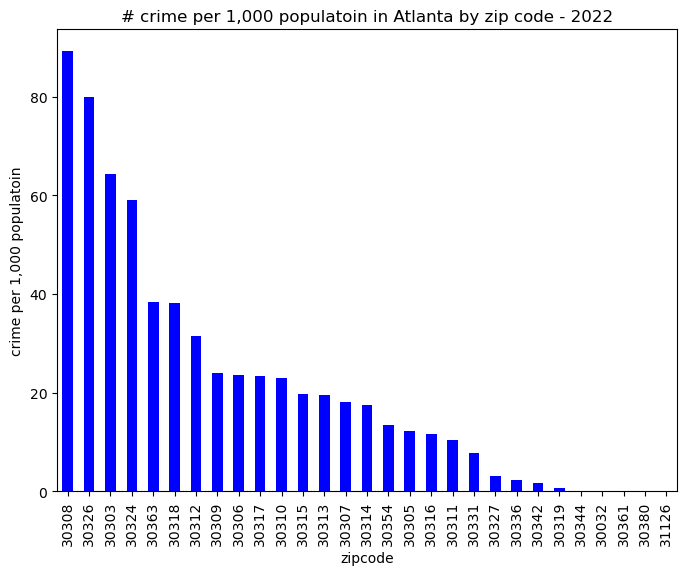

In [143]:
# bar chart based on density 
y1 = data_new.groupby(["zipcode"]).max().sort_values(by="crime/100kpop", ascending=False)["crime/100kpop"]


figure1 = y1.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="# crime per 1,000 populatoin in Atlanta by zip code - 2022",
                                xlabel="zipcode",
                                ylabel="crime per 1,000 populatoin")

#xticklabels = data["zipcode"].unique()
#figure1.set_xticklabels(xticklabels, rotation= 45, rotation_mode="anchor", ha="right", wrap=True)

#plt.show()

In [145]:
# define time range that any crime happened
for i in range(0,data_new.shape[0]):
    if (data_new["occur_time"][i] >= "00:00") & (data_new["occur_time"][i] < "06:00"):
        data_new["time_range"][i] = "night"
    elif (data_new["occur_time"][i] >= "06:00") & (data_new["occur_time"][i] < "12:00"):
        data_new["time_range"][i] = "morning"
    elif (data_new["occur_time"][i] >= "12:00") & (data_new["occur_time"][i] < "18:00"):
        data_new["time_range"][i] = "afternoon"
    else:
        data_new["time_range"][i] = "evening"                                       

data_new        

C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\2543201733.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["time_range"][i] = "evening"
C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\2543201733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["time_range"][i] = "morning"
C:\Users\shams_a\AppData\Local\Temp\ipykernel_20476\2543201733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["time_ran

,level_0,index,offense_id,rpt_date,occur_date,occur_day,occur_day_num,occur_time,poss_date,poss_time,...,UC2_Literal,neighborhood,npu,lat,long,zipcode,time_range,pop,total_crime,crime/100kpop
0,0,0,22011609,7/20/2022,7/20/2022,Wednesday,4.0,18:30,7/20/2022,19:00,...,LARCENY-NON VEHICLE,Custer/McDonough/Guice,W,33.716073,-84.353217,30316,evening,65881.0,765,11.611846
1,1,1,22254073,9/11/2022,9/11/2022,Sunday,1.0,11:15,9/11/2022,11:45,...,LARCENY-FROM VEHICLE,Reynoldstown,N,33.746335,-84.361753,30316,morning,65881.0,765,11.611846
2,2,2,202800283,6/14/2022,10/6/2020,Tuesday,3.0,05:21,10/6/2020,05:40,...,LARCENY-FROM VEHICLE,Fairburn,P,33.690551,-84.520970,30331,night,148391.0,1163,7.837403
3,3,3,203140048,2/21/2022,11/9/2020,Monday,2.0,00:32,11/9/2020,01:49,...,AGG ASSAULT,Adams Park,R,33.706526,-84.458000,30311,night,88312.0,927,10.496875
4,4,4,203250206,4/15/2022,11/20/2020,Friday,6.0,01:40,11/20/2020,01:45,...,LARCENY-NON VEHICLE,Center Hill,J,33.776168,-84.472729,30318,night,76746.0,2926,38.125766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20096,20101,21568,223641776,12/30/2022,12/30/2022,Friday,6.0,19:08,12/30/2022,19:09,...,LARCENY-NON VEHICLE,Midtown,E,33.775198,-84.365840,30308,evening,13210.0,1178,89.174868
20097,20102,21569,223641783,12/30/2022,12/30/2022,Friday,6.0,14:51,12/30/2022,16:40,...,LARCENY-NON VEHICLE,Mechanicsville,V,33.740863,-84.404238,30312,afternoon,42243.0,1330,31.484506
20098,20103,21570,223641886,12/30/2022,12/30/2022,Friday,6.0,17:00,12/30/2022,22:42,...,AUTO THEFT,Vine City,L,33.755968,-84.416293,30314,afternoon,60526.0,1061,17.529657
20099,20104,21571,223641980,12/30/2022,12/30/2022,Friday,6.0,21:03,12/30/2022,21:37,...,LARCENY-FROM VEHICLE,Inman Park,N,33.761914,-84.360387,30307,evening,39047.0,710,18.183215


In [ ]:
###### the end 1/26/23 -

In [146]:
z = data_new.groupby(["zipcode","time_range"]).count()
z

level_0  index  offense_id  rpt_date  occur_date  \
zipcode time_range                                                     
30032   evening           1      1           1         1           1   
30303   afternoon       288    288         288       288         288   
        evening         384    384         384       384         384   
        morning         173    173         173       173         173   
        night           210    210         210       210         210   
...                     ...    ...         ...       ...         ...   
30363   night            10     10          10        10          10   
30380   afternoon         1      1           1         1           1   
31126   afternoon         2      2           2         2           2   
        evening           1      1           1         1           1   
        morning           1      1           1         1           1   

                    occur_day  occur_day_num  occur_time  poss_date  \
zipcode time_range                                                    
30032   evening             1              1           1          1   
30303   afternoon         288            288         288        288   
        evening           384            384         384        384   
        morning           173            173         173        173   
        night             210            210         210        210   
...                       ...            ...         ...        ...   
30363   night              10             10          10         10   
30380   afternoon           1              1           1          1   
31126   afternoon           2              2           2          2   
        evening             1              1           1          1   
        morning             1              1           1          1   

                    poss_time  ...  location  ibr_code  UC2_Literal  \
zipcode time_range             ...                                    
30032   evening             1  ...         1         1            1   
30303   afternoon         288  ...       288       288          288   
        evening           384  ...       384       384          384   
        morning           173  ...       173       173          173   
        night             210  ...       210       210          210   
...                       ...  ...       ...       ...          ...   
30363   night              10  ...        10        10           10   
30380   afternoon           1  ...         1         1            1   
31126   afternoon           2  ...         2         2            2   
        evening             1  ...         1         1            1   
        morning             1  ...         1         1            1   

                    neighborhood  npu  lat  long  pop  total_crime  \
zipcode time_range                                                   
30032   evening                1    1    1     1    1            1   
30303   afternoon            288  288  288   288  288          288   
        evening              384  384  384   384  384          384   
        morning              173  173  173   173  173          173   
        night                210  210  210   210  210          210   
...                          ...  ...  ...   ...  ...          ...   
30363   night                 10   10   10    10   10           10   
30380   afternoon              1    1    1     1    0            1   
31126   afternoon              2    2    2     2    0            2   
        evening                1    1    1     1    0            1   
        morning                1    1    1     1    0            1   

                    crime/100kpop  
zipcode time_range                 
30032   evening                 1  
30303   afternoon             288  
        evening               384  
        morning               173  
        night                 210  
...                           ...  
30363   night                  10  


In [38]:
zip=data["zipcode"].unique()
zip

array(['30316', '30331', '30311', '30318', '30310', '30308', '30324',
       '30312', '30315', '30309', '30314'], dtype=object)

In [ ]:
data

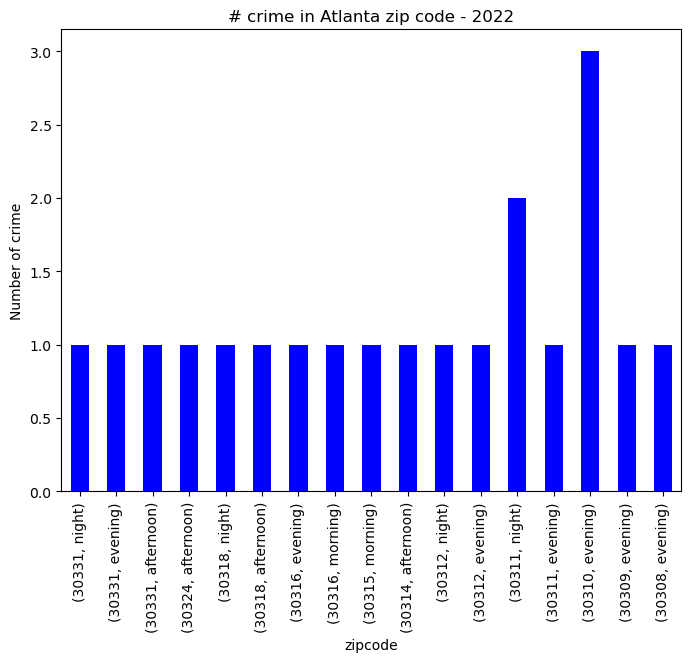

In [31]:
y1 = data.groupby(["zipcode","time_range"]).count().sort_values(by="zipcode", ascending=False)["offense_id"]
#x1 = clean_data["Drug Regimen"].unique()

figure1 = y1.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="# crime in Atlanta zip code - 2022",
                                xlabel="zipcode",
                                ylabel="Number of crime")